## Sample Notebook Comparing Pytorch And MDF Model

### Importing Libraries

In [1]:
from torchvision import transforms
from torchvision.io import read_image
import torch
from PIL import Image
import torchvision.models as models
import numpy as np
import netron
from torchviz import make_dot
import ast
# import MDF libraries
from modeci_mdf.interfaces.pytorch import pytorch_to_mdf
from modeci_mdf.execution_engine import EvaluableGraph

### Preprocess the Input Image

In [2]:
#preprocessing the input image
def image_loader(loader, image):
    image = loader(image).float()
    image = image.clone().detach().requires_grad_(True)
    image = image.unsqueeze(0)
    return image
data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

### Load Pretrained Model

In [3]:
# load the pretrained nodel
model = models.inception_v3(pretrained = True)

### Evaluate Pretrained Model 

In [4]:
#Evaluate pretrained model to get rid of randomization like batch-normalization and dropout
model.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

### Load Input Image

In [5]:
# input image
input_image = Image.open("elephant.jpg")

### Display Input Image

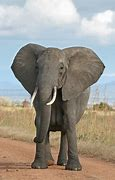

In [6]:
# display  input image
display(input_image)

### Load Output Classes 

In [14]:
# load output classes for the dataset
filename = 'gistfile1.txt'
with open(filename) as file:
    data = file.read()
    
    
f = ast.literal_eval(data)
print(f)

{0: 'tench, Tinca tinca', 1: 'goldfish, Carassius auratus', 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 3: 'tiger shark, Galeocerdo cuvieri', 4: 'hammerhead, hammerhead shark', 5: 'electric ray, crampfish, numbfish, torpedo', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich, Struthio camelus', 10: 'brambling, Fringilla montifringilla', 11: 'goldfinch, Carduelis carduelis', 12: 'house finch, linnet, Carpodacus mexicanus', 13: 'junco, snowbird', 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 15: 'robin, American robin, Turdus migratorius', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water ouzel, dipper', 21: 'kite', 22: 'bald eagle, American eagle, Haliaeetus leucocephalus', 23: 'vulture', 24: 'great grey owl, great gray owl, Strix nebulosa', 25: 'European fire salamander, Salamandra salamandra', 26: 'common newt, Triturus vulgaris', 27: 'eft', 28: 'spotted salamander, Ambystoma maculatum', 29: 'axolotl, mu

### Pass the input through Pytorch Model

In [21]:
input = image_loader(data_transforms, input_image)
output = model(input).detach().numpy()
output_label = np.argmax(output)
pytorch_output = f[output_label]
print(pytorch_output)

tusker


### Convert Pytorch Model to MDF

In [9]:
# convert pytorch model to MDF
mdf_model, params_dict = pytorch_to_mdf(
        model=model,
        args=input,
        trace = True
        )

### Generate Graph From the Model

In [10]:
# generate the graph
mdf_graph = mdf_model.graphs[0]

### Evaluating the model

In [11]:

params_dict["input1"] = input.detach().numpy()
eg = EvaluableGraph(graph=mdf_graph, verbose=False)


#evaluate the model
eg.evaluate(initializer=params_dict)


Init graph: Inception3Graph
Evaluating graph: Inception3Graph, root nodes: ['Gather_582', 'Gather_590', 'Gather_598'], with array format numpy


### Generate MDF Output

In [22]:
# print out MDF output
output_mdf = eg.output_enodes[0].get_output()
op_label_mdf = np.argmax(output_mdf)
MDF_output = f[op_label_mdf]
print(MDF_output)

tusker


In [25]:
assert pytorch_output == MDF_output
print("All test passed")

All test passed


### Generate Graph from Model

Converting MDF graph: Inception3Graph to graphviz (level: 1, format: png)
    Node: Gather_582
    Node: Unsqueeze_584
    Node: Mul_586
    Node: Add_588
    Node: Gather_590
    Node: Unsqueeze_592
    Node: Mul_594
    Node: Add_596
    Node: Gather_598
    Node: Unsqueeze_600
    Node: Mul_602
    Node: Add_604
    Node: Concat_605
    Node: Conv_933
    Node: Relu_608
    Node: Conv_936
    Node: Relu_611
    Node: Conv_939
    Node: Relu_614
    Node: MaxPool_615
    Node: Conv_942
    Node: Relu_618
    Node: Conv_945
    Node: Relu_621
    Node: MaxPool_622
    Node: Conv_948
    Node: Relu_625
    Node: Conv_951
    Node: Relu_628
    Node: Conv_954
    Node: Relu_631
    Node: Conv_957
    Node: Relu_634
    Node: Conv_960
    Node: Relu_637
    Node: Conv_963
    Node: Relu_640
    Node: Pad_642
    Node: AveragePool_643
    Node: Conv_966
    Node: Relu_646
    Node: Concat_647
    Node: Conv_969
    Node: Relu_650
    Node: Conv_972
    Node: Relu_653
    Node: Conv_975
  

Written graph image to: example.png


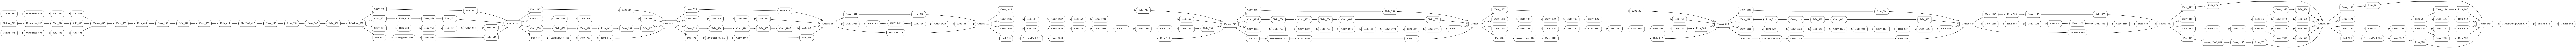

In [13]:
#generate MDF graph
mdf_model.to_graph_image(
    engine="dot",
    output_format="png",
    view_on_render=False,
    level=1,
    filename_root="example",
    only_warn_on_fail=True,
    is_horizontal = True,
    
)
from IPython.display import Image
Image(filename="example.png")

### Generate ONNX Graph

In [16]:
try:
    from IPython.display import Image
    onnx_graph = Image(filename="example.onnx.png")
    display(onnx_graph)
except:
    import netron 
    torch.onnx.export(
    model,
    input,
    "example.onnx",
    verbose=True,
    input_names=[],
    opset_version=9,
    )
    netron.start("example.onnx")

graph(%x.1 : Float(1, 3, 224, 224, strides=[150528, 50176, 224, 1], requires_grad=1, device=cpu),
      %fc.weight : Float(1000, 2048, strides=[2048, 1], requires_grad=1, device=cpu),
      %fc.bias : Float(1000, strides=[1], requires_grad=1, device=cpu),
      %922 : Float(32, 3, 3, 3, strides=[27, 9, 3, 1], requires_grad=0, device=cpu),
      %923 : Float(32, strides=[1], requires_grad=0, device=cpu),
      %925 : Float(32, 32, 3, 3, strides=[288, 9, 3, 1], requires_grad=0, device=cpu),
      %926 : Float(32, strides=[1], requires_grad=0, device=cpu),
      %928 : Float(64, 32, 3, 3, strides=[288, 9, 3, 1], requires_grad=0, device=cpu),
      %929 : Float(64, strides=[1], requires_grad=0, device=cpu),
      %931 : Float(80, 64, 1, 1, strides=[64, 1, 1, 1], requires_grad=0, device=cpu),
      %932 : Float(80, strides=[1], requires_grad=0, device=cpu),
      %934 : Float(192, 80, 3, 3, strides=[720, 9, 3, 1], requires_grad=0, device=cpu),
      %935 : Float(192, strides=[1], requires_g

Serving 'example.onnx' at http://localhost:8080
